# **Instituto de Informática (INF)/UFRGS**
### Disciplina INF01017 - Aprendizado de Máquina
#### *Profa. Mariana Recamonde-Mendoza (mrmendoza@inf.ufrgs.br)*
<br>

---
***Observação:*** *Este notebook é disponibilizado aos alunos como complemento às aulas  e aos slides preparados pela professora. Desta forma, os principais conceitos são apresentados no material teórico fornecido. O objetivo deste notebook é reforçar os conceitos e demonstrar questões práticas no uso de algoritmos e estratégias de avaliação em Aprendizado de Máquina.*


---

## **Tópico: Avaliação de modelos, overfitting e underfitting**


**Objetivos da atividade:**
- Analisar o impacto de aspectos como dimensão dos dados, aleatoriedade na divisão de dados e repetições na avaliação de modelos com Holdout
- Compreender os conceitos de overfitting e underfitting, com exemplos práticos

O notebook usa como base o algoritmo de Redes Neurais.

# **Nome e matrícula:** Pedro Lubaszewski Lima (00341810)

# Parte 1: Impacto de aspectos relacionados a volume de dados e repetições na avaliação de modelos com Holdout.

Esta parte do notebook usará os dados de câncer de mama, usando a função do sklearn para carregamento dos dados.

### Carregando as bibliotecas e dados


In [9]:
import pandas as pd             # biblioteca para análise de dados
import matplotlib.pyplot as plt # biblioteca para visualização de informações
import seaborn as sns           # biblioteca para visualização de informações
import numpy as np              # biblioteca para operações com arrays multidimensionais
from sklearn.datasets import load_breast_cancer ## conjunto de dados a ser analisado
sns.set_theme()

In [10]:
## Carregando os dados - Câncer de Mama
## https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

data = load_breast_cancer() ## carrega os dados de breast cancer
X = data.data  # matriz contendo os atributos
y = data.target  # vetor contendo a classe (0 para maligno e 1 para benigno) de cada instância
feature_names = data.feature_names  # nome de cada atributo
target_names = data.target_names  # nome de cada classe

In [11]:
print(f"Dimensões de X: {X.shape}\n")
print(f"Dimensões de y: {y.shape}\n")
print(f"Nomes dos atributos: {feature_names}\n")
print(f"Nomes das classes: {target_names}")

Dimensões de X: (569, 30)

Dimensões de y: (569,)

Nomes dos atributos: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Nomes das classes: ['malignant' 'benign']


In [12]:
## transforma NumPy Array para Pandas DataFrame
data_df = pd.DataFrame(X,columns=feature_names)

## sumariza os atributos numéricos (todos, neste caso)
data_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Fazendo a divisão dos dados com Holdout de 3 vias (treino/validação/teste)

In [13]:
#Carregando funções específicas do scikit-learn
from sklearn.model_selection import train_test_split # função do scikit-learn que implementa um holdout
from sklearn.neural_network import MLPClassifier ## função para treinamento de uma rede neural
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report # métricas de desempenho
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # matriz de confusão

In [14]:
##HOLDOUT de 2 vias: separa os dados em treino e teste, de forma estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y) ## atenção: inicialmente, não mude o random_state para este exercício
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


Em alguns momentos deste notebook, a partição de treino será usada em um processo de validação cruzada, para otimização do modelo. Em outros momentos, será usada apenas para treinamento, visando avaliar impacto de aspectos como tamanho do conjunto de treino ou de teste no desempenho do modelo.

In [15]:
# ## HOLDOUT de 3 vias: separa os dados em treino e teste, de forma estratificada

# ## Definindo as proporções de treino, validação e teste.
# train_ratio = 0.70
# test_ratio = 0.15
# validation_ratio = 0.15

# ## Fazendo a primeira divisão, para separar um conjunto de teste dos demais.
# ## Assuma X_temp e y_temp para os dados de treinamento+validação e X_test e y_test para os de teste
# ## Dica: configure o random_state para facilitar reprodutibilidade dos experimentos

# X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=test_ratio,random_state=42,stratify=y)

# ## Fazendo a segunda divisão, para gerar o conjunto de treino e validação a partir
# ## do conjunto de 'treinamento' da divisão anterior
# ## Assuma X_train e y_train para os dados de treinamento e X_valid e y_valid para os de teste
# ## Dica: configure o random_state para facilitar reprodutibilidade dos experimentos

# X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=validation_ratio/(train_ratio+test_ratio),random_state=42,stratify=y_temp)

# print(X_train.shape)
# print(X_test.shape)
# print(X_valid.shape)

### Pré-processamento: Normalizando os dados

A normalização é feita de forma a evitar **Data Leakage** (vazamento de informações dos dados de teste durante o treinamento dos modelos). Os parâmetros para normalização são estimados a partir dos dados de treino, e posteriormente aplicados para normalizar todos os dados, isto é, treino, validação e teste.

A normalização é imprescindível para algoritmos como redes neurais, regressões, kNN, etc

In [16]:
from sklearn.preprocessing import MinMaxScaler # função do scikit-learn que implementa normalização min-max

## O MinMaxScaler transformará os dados para que fiquem no intervalo [0,1]
scaler = MinMaxScaler()

## Iniciar a normalização dos dados. Primeiro fazer um 'fit' do scaler nos
## dados de treino. Esta etapa visa "aprender" os parâmetros para normalização.
## No caso do MinMaxScales, são os valores mínimos e máximos de cada atributo
scaler.fit(X_train)

## Aplicar a normalização nos três conjuntos de dados:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#X_valid = scaler.transform(X_valid)

### Treinando um modelo de rede neural (Multilayer Perceptron, MLP) - com otimização de hiperparâmetros

In [17]:
from sklearn.model_selection import GridSearchCV
mlp_model = MLPClassifier(max_iter=200, activation='relu',solver='sgd',alpha=0.0001,learning_rate='constant',random_state=42)

parameter_space = {
    'hidden_layer_sizes': [(20,),(50,),(100,),(20,10,),(50,25,),(100,50,),(200,100,),(200,100,25)],
}


clf = GridSearchCV(mlp_model, parameter_space, n_jobs=-1, cv=5) #otimização de hiperparâmetros com 5-fold cross-validation
clf.fit(X_train, y_train)

# Melhor configuração de hiperparâmetros
print('Best hyperparameters found:\n', clf.best_params_)

# Todos os resultados
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

y_true, y_pred = y_test , clf.predict(X_test)

print('Results on the test set:')
print(classification_report(y_true, y_pred))


/home/pllima0909/Documents/Git/INF01017-Machine-Learning/Supervised_Learning/A02_-_Decision_Trees/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pllima0909/Documents/Git/INF01017-Machine-Learning/Supervised_Learning/A02_-_Decision_Trees/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pllima0909/Documents/Git/INF01017-Machine-Learning/Supervised_Learning/A02_-_Decision_Trees/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pllima0909/Documents/Git/INF

Best hyperparameters found:
 {'hidden_layer_sizes': (200, 100, 25)}
0.853 (+/-0.045) for {'hidden_layer_sizes': (20,)}
0.895 (+/-0.057) for {'hidden_layer_sizes': (50,)}
0.899 (+/-0.045) for {'hidden_layer_sizes': (100,)}
0.642 (+/-0.018) for {'hidden_layer_sizes': (20, 10)}
0.901 (+/-0.028) for {'hidden_layer_sizes': (50, 25)}
0.925 (+/-0.056) for {'hidden_layer_sizes': (100, 50)}
0.919 (+/-0.045) for {'hidden_layer_sizes': (200, 100)}
0.945 (+/-0.028) for {'hidden_layer_sizes': (200, 100, 25)}
Results on the test set:
              precision    recall  f1-score   support

           0       0.97      0.88      0.93        42
           1       0.93      0.99      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



/home/pllima0909/Documents/Git/INF01017-Machine-Learning/Supervised_Learning/A02_-_Decision_Trees/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
clf

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42, solver='sgd'),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(20,), (50,), (100,), (20, 10),
                                                (50, 25), (100, 50), (200, 100),
                                                (200, 100, 25)]})

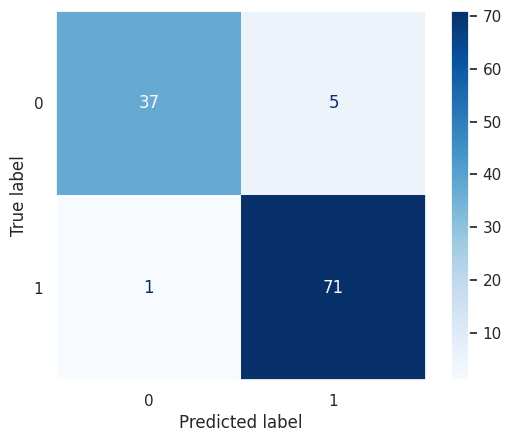

In [19]:
cm = confusion_matrix(y_true, y_pred,labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp = disp.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

### Analisando o impacto da divisão aleatória de dados no desempenho de modelos




Esta análise será feita considerando um holdout simples, de 2 vias. A divisão de dados será repetida 30 vezes, variando o random_state (semente aleatória), para assegurar divisões distintas dos dados. Em todos os casos, estamos dividindo os dados em 70% treino e 30% teste.

**Atenção:** Para controlar o tempo de execução deste experimento, foi definido um máximo de 100 iterações no treinamento da rede neural. O número máximo de iterações estabelecido no código pode não ser o suficiente para a convergência do algoritmo de aprendizado, e isso pode gerar Warnings na execução. Como o intuito deste notebook é avaliar impacto de algumas decisões de divisão de dados no desmepenho do algoritmo, o fato de não atingirmos a melhor faixa de desempenho possível não é um empecilho para compreensão dos experimentos.

In [ ]:
# Inicializar listas para armazenar os resultados
accuracies = []
random_states = []

# Avaliar modelos 30 vezes, variando o random_state
for i in range(30):
    random_state = np.random.randint(0, 1000)  # Gerar um random_state aleatório
    random_states.append(random_state)

    # Dividir os dados entre treino e teste (proporção fixa)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    # Normalizar dados
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Treinar o modelo
    clf = MLPClassifier(max_iter=100, activation='relu',solver='adam',alpha=0.0001,learning_rate='constant',hidden_layer_sizes=(200, 100, 25),random_state=42) #random state fixo para controlar a aleatoriedade do algoritmo MLP
    clf.fit(X_train, y_train)

    # Classificação e avaliação no conjunto de teste
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy*100)


    # Exibir o desempenho a cada iteração
    print(f"Iteração {i+1}: Random State={random_state}, Acurácia={accuracy:.2f}")


# Plotar a variação das acurácias
plt.figure(figsize=(10,6))
plt.plot(range(1, 31), accuracies, marker='o', linestyle='--', color='b')
plt.title('Variação da Acurácia do Modelo em 30 Iterações com Random State Diferente')
plt.xlabel('Iteração')
plt.ylabel('Acurácia')
plt.xticks(range(1, 31))
plt.grid(True)
plt.show()

In [ ]:
# Amplitude dos resultados
max(accuracies) - min(accuracies)

**>> Analise e Discuta:**

Observe a variação do valor de *random_state* na divisão dos dados e os respectivos resultados do desempenho na classificação. Como isso afeta os resultados?  Explique o impacto de diferentes divisões dos dados de treino/teste no desempenho dos modelos. Por que é importante repetir os experimentos várias vezes, variando o random_state da divisão dos? O que a repetição traz em termos de confiabilidade dos resultados?

Se desejar, retire o random_state do algoritmo MLP (atualmente configurado como 42) e observe como isso impacta os resultados e suas conclusões.



**Sua resposta aqui:**

---

### Analisando o impacto do tamanho do conjunto de teste na avaliação de desempenho dos modelos



Esta análise será feita considerando um holdout simples, de 2 vias. A divisão de dados será repetida 10 vezes para cada proporção pré-definida de dados de teste, variando o random_state (semente aleatória) para assegurar divisões distintas dos dados. São testadas divisões que variam de 5% a 70% dos dados para o conjunto de teste.

**Atenção:** Para controlar o tempo de execução deste experimento, foi definido um máximo de 100 iterações no treinamento da rede neural. O número máximo de iterações estabelecido no código pode não ser o suficiente para a convergência do algoritmo de aprendizado, e isso pode gerar Warnings na execução. Como o intuito deste notebook é avaliar impacto de algumas decisões de divisão de dados no desmepenho do algoritmo, o fato de não atingirmos a melhor faixa de desempenho possível não é um empecilho para compreensão dos experimentos.

In [ ]:
# Inicializar listas para armazenar resultados
variances = []
amplitudes = []
avg_accuracies = []

# Definir as proporções de conjunto de teste
test_sizes = np.arange(0.05, 0.70, 0.05)

# Loop para cada proporção de conjunto de teste
for test_size in test_sizes:
    accuracies = []

    # Repetir o experimento 10 vezes para cada tamanho de conjunto de teste
    for i in range(10):
        random_state = np.random.randint(0, 1000)

        # Dividir os dados com a proporção especificada para o conjunto de teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        # Normalizar dados
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        # Treinar o modelo
        clf = MLPClassifier(max_iter=100, activation='relu',solver='adam',alpha=0.0001,learning_rate='constant',hidden_layer_sizes=(200, 100, 25),random_state=42) #random state fixo para controlar a aleatoriedade do algoritmo MLP
        clf.fit(X_train, y_train)

        # Classificação e avaliação no conjunto de teste
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy*100)

    # Calcular variância, amplitude e média dos desempenhos
    variance = np.var(accuracies)
    amplitude = np.max(accuracies) - np.min(accuracies)
    avg_accuracy = np.mean(accuracies)

    # Armazenar os resultados
    variances.append(variance)
    amplitudes.append(amplitude)
    avg_accuracies.append(avg_accuracy)

    # Exibir os resultados intermediários
    print(f"Tamanho do Conjunto de Teste: {test_size*100:.1f}%")
    print(f"   Média da Acurácia: {avg_accuracy:.3f}")
    print(f"   Variância: {variance:.5f}")
    print(f"   Amplitude (Máx - Mín): {amplitude:.3f}")
    print("")

# Gráfico: Variação da Acurácia com Diferentes Tamanhos de Conjunto de Teste
plt.figure(figsize=(10,6))
plt.plot(test_sizes * 100, avg_accuracies, marker='o', linestyle='--', color='b', label="Média das Acurácias")
plt.title('Média da Acurácia com Diferentes Tamanhos de Conjunto de Teste')
plt.xlabel('Tamanho do Conjunto de Teste (%)')
plt.ylabel('Média da Acurácia')
plt.grid(True)
plt.legend()
plt.show()

# Gráfico: Variância vs Tamanho do Conjunto de Teste
plt.figure(figsize=(10,6))
plt.scatter(test_sizes * 100, variances, color='r', label="Variância do Desempenho")
plt.title('Variância do Desempenho vs Tamanho do Conjunto de Teste')
plt.xlabel('Tamanho do Conjunto de Teste (%)')
plt.ylabel('Variância do Desempenho')
plt.grid(True)
plt.legend()
plt.show()

# Gráfico: Amplitude vs Tamanho do Conjunto de Teste
plt.figure(figsize=(10,6))
plt.scatter(test_sizes * 100, amplitudes, color='g', label="Amplitude (Máx - Mín)")
plt.title('Amplitude do Desempenho vs Tamanho do Conjunto de Teste')
plt.xlabel('Tamanho do Conjunto de Teste (%)')
plt.ylabel('Amplitude do Desempenho')
plt.grid(True)
plt.legend()
plt.show()

**>> Analise e Discuta:**

Conforme o tamanho do conjunto de teste aumenta, como muda a variância no desempenho do modelo? Por que esse comportamento ocorre? Ao comparar a amplitude (diferença entre o máximo e o mínimo) do desempenho em diferentes tamanhos de conjunto de teste, o que você observa? Qual é a relação entre o tamanho do teste e a amplitude dos resultados?

Se a variância dos resultados de acurácia for muito alta, o que isso pode indicar sobre o seu modelo ou sobre a forma como os dados estão sendo divididos?




**Sua resposta aqui:**

---

### Analisando o impacto do tamanho do conjunto de treino na avaliação de desempenho dos modelos



Esta análise será feita considerando um holdout simples, de 2 vias. A divisão de dados será repetida 10 vezes para cada proporção pré-definida de dados de treino, variando o random_state (semente aleatória) para assegurar divisões distintas dos dados. São testadas divisões que variam de 5% a 80% dos dados para o conjunto de treino, usando um conjunto de teste fixo.

**Atenção:** Para controlar o tempo de execução deste experimento, foi definido um máximo de 100 iterações no treinamento da rede neural. O número máximo de iterações estabelecido no código pode não ser o suficiente para a convergência do algoritmo de aprendizado, e isso pode gerar Warnings na execução. Como o intuito deste notebook é avaliar impacto de algumas decisões de divisão de dados no desmepenho do algoritmo, o fato de não atingirmos a melhor faixa de desempenho possível não é um empecilho para compreensão dos experimentos.

In [ ]:
# Função para rodar o treinamento do algoritmo com diferentes tamanhos de treino
def run_training_analysis(X, y, test_size=0.1, train_sizes=[0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8], iterations=10):
    results = {}

    # Fixando o conjunto de teste
    X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Normalizar dados
    scaler.fit(X_train_full)
    X_train = scaler.transform(X_train_full)
    X_test = scaler.transform(X_test)

    for train_size in train_sizes:
        accuracies = []
        for _ in range(iterations):
            # Variando o tamanho do conjunto de treino (fixando o conjunto de teste)
            X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, train_size=train_size, random_state=None)

            # Treinar o modelo
            clf = MLPClassifier(max_iter=100, activation='relu',solver='adam',alpha=0.0001,learning_rate='constant',random_state=42) #random state fixo para controlar a aleatoriedade do algoritmo MLP
            clf.fit(X_train, y_train)

            # Classificação e avaliação no conjunto de teste
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy*100)

        # Calculando a variância e a amplitude (máx - mín) das acurácias
        variance = np.var(accuracies)
        amplitude = np.max(accuracies) - np.min(accuracies)
        average = np.mean(accuracies)
        results[train_size] = {'accuracies': accuracies, 'variance': variance, 'amplitude': amplitude, 'average': average}
    return results

# Exemplo de uso
results = run_training_analysis(X, y)

# Plotando os resultados
train_sizes = []
variances = []
amplitudes = []
averages = []

for train_size, metrics in results.items():
    train_sizes.append(train_size)
    variances.append(metrics['variance'])
    amplitudes.append(metrics['amplitude'])
    averages.append(metrics['average'])

# Gráfico de variância vs tamanho do conjunto de treino
plt.figure(figsize=(10, 6))
plt.scatter(train_sizes, variances, c='blue', label='Variância do Desempenho')
plt.plot(train_sizes, variances, color='blue', linestyle='--')
plt.xlabel('Proporção do Conjunto de Treino')
plt.ylabel('Variância da Acurácia')
plt.title('Variância da Acurácia em Função do Tamanho do Conjunto de Treino')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de amplitude vs tamanho do conjunto de treino
plt.figure(figsize=(10, 6))
plt.scatter(train_sizes, amplitudes, c='red', label='Amplitude do Desempenho (Max - Min)')
plt.plot(train_sizes, amplitudes, color='red', linestyle='--')
plt.xlabel('Proporção do Conjunto de Treino')
plt.ylabel('Amplitude da Acurácia')
plt.title('Amplitude da Acurácia em Função do Tamanho do Conjunto de Treino')
plt.legend()
plt.grid(True)
plt.show()


# Gráfico de média vs tamanho do conjunto de treino
plt.figure(figsize=(10, 6))
plt.scatter(train_sizes, averages, c='b', label='Média')
plt.plot(train_sizes, averages, color='b', linestyle='--')
plt.xlabel('Proporção do Conjunto de Treino')
plt.ylabel('Média da Acurácia')
plt.title('Média da Acurácia em Função do Tamanho do Conjunto de Treino')
plt.legend()
plt.grid(True)
plt.show()

**>> Analise e Discuta:**

Mantendo o conjunto de teste fixo, por que vemos uma queda na variância e na amplitude conforme mais dados de treino são utilizados?Como a amplitude (diferença entre o máximo e o mínimo) do desempenho varia com o tamanho do conjunto de treino? O que isso nos diz sobre a confiabilidade do modelo com tamanhos pequenos de conjunto de treino?


**Sua resposta aqui:**

---

# Parte 2: Análise e entendimento de overfitting e underfitting.


Esta parte do notebook é baseado no Tutorial: https://thedatafrog.com/en/articles/overfitting-illustrated/

## Criando um dataset sintético

Vamos criar uma amostra de exemplos com dois atributos x1 e x2, e duas classes. Para a classe 0, a distribuição de probabilidade subjacente é uma Gaussiana 2D centrada em (0,0), com largura = 1 ao longo de ambas as direções. Para a classe 1, a Gaussiana é centrada em (1,1).

In [ ]:
%matplotlib inline
np.random.seed(0xdeadbeef)

def make_sample(nexamples, means=([0.,0.],[1.,1.]), sigma=1.):
    normal = np.random.multivariate_normal
    # squared width:
    s2 = sigma**2.
    # below, we provide the coordinates of the mean as
    # a first argument, and then the covariance matrix
    # which describes the width of the Gaussian along the
    # two directions.
    # we generate nexamples examples for each category
    sgx0 = normal(means[0], [[s2, 0.], [0.,s2]], nexamples)
    sgx1 = normal(means[1], [[s2, 0.], [0.,s2]], nexamples)
    # setting the labels for each category
    sgy0 = np.zeros((nexamples,))
    sgy1 = np.ones((nexamples,))
    sgx = np.concatenate([sgx0,sgx1])
    sgy = np.concatenate([sgy0,sgy1])
    return sgx, sgy

Aqui, criamos uma amostra de treinamento  (sgx, sgy)  muito pequena com apenas 30 exemplos por classe, e uma amostra de teste (tgx, tgy) com 200 exemplos por classe. Estamos usando uma amostra de treinamento pequena pra mostrar que poucos dados favorecem overfitting.

In [ ]:
sgx, sgy = make_sample(30)
tgx, tgy = make_sample(200)

In [ ]:
# plot do dataset pequeno, as cores são de acordo com a classe
plt.scatter(sgx[:,0], sgx[:,1], alpha=0.5, c=sgy, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')

Vemos que com um número tão baixo de exemplos, não é óbvio que as amostras seguem funções de densidade de probabilidade gaussianas. Além disso, como as gaussianas são tão próximas, será bem difícil separar as duas categorias.



## Overfitting

Vamos tentar classificar os dados com uma rede neural "complexa", de forma proposital para ilustrar o overfitting. Ela é construida na célula abaixo, com as características (pode ser customizado):

*   3 camadas ocultas de 50 neurônios cada,
*   Ativação ReLU, pois a Função ReLU torna o treinamento mais fácil em redes neurais com camadas ocultas,
* Otimizador Adam, variação sofisticada da descida de gradiente,
* um número máximo elevado de iterações, para que a rede tenha tempo para convergir,
* uma semente aleatória fixa para que você possa obter exatamente os mesmos resultados que eu, toda vez que executar o código


In [ ]:
def get_scikit_mlp(data_x, data_y):
  mlp = MLPClassifier(hidden_layer_sizes=(50,50,50), activation='relu', max_iter=500, random_state=1)
  mlp.fit(data_x, data_y)
  return mlp

Agora vamos definir uma pequena função para plotar nossos resultados. A função plotará os exemplos nas duas classes, bem como a probabilidade de que um ponto (x1,x2) pertença à classe 1 (preto significa que essa probabilidade está próxima de 1, e branco, de 0). Não se preocupe com esse código, apenas que ele recebe a rede treinada e os dados para mostrar.

In [ ]:
def plot_result_scikit(model, data_x, data_y, linrange=(-5,5,101)):
    xmin, xmax, npoints = linrange
    gridx1, gridx2 = np.meshgrid(np.linspace(xmin,xmax,npoints), np.linspace(xmin,xmax,npoints))
    grid = np.c_[gridx1.flatten(), gridx2.flatten()]

    probs = model.predict_proba(grid)

    accuracy = accuracy_score(data_y, model.predict(data_x))
    print(f"Accuracy: {accuracy:.5f}")

    #print(probs)
    plt.pcolor(gridx1, gridx2, probs[:,1].reshape(npoints,npoints), cmap='binary')
    plt.colorbar()
    plt.scatter(data_x[:,0], data_x[:,1], c=data_y, cmap='plasma', alpha=0.5, marker='.')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()


In [ ]:
#treinamento do modelo
scikit_model = get_scikit_mlp(sgx, sgy)

#avaliação e visualização nos dados de treino
plot_result_scikit(scikit_model, sgx,sgy)

In [ ]:
# avaliação e visualização nos dados de teste
plot_result_scikit(scikit_model, tgx,tgy)

**>> Analise e Discuta:**

Observando os gráficos acima e comparando os resultados para treino e teste, quais características lhe chamam a atenção como indícios de um overfitting no modelo treinado? Analise não só o desempenho em termos quantitativo, mas também características da fronteira de decisão.


**Sua resposta aqui:**

---

## Diminuindo a complexidade da rede neural


Agora vamos tentar novamente, mas com uma rede muito mais simples, com uma única camada com três neurônios. A rede é treinada com a pequena amostra de treinamento, e então utilizada para classificação dos dados de teste. Para fins de análise dos resultados, serão mostrados o desempenho e a fronteira de decisão nos conjuntos de treino e teste.

In [ ]:
sgx, sgy = make_sample(30)
tgx, tgy = make_sample(200)

In [ ]:
def get_smaller_scikit_mlp(data_x, data_y):
  mlp = MLPClassifier(hidden_layer_sizes=(3,), activation='relu', max_iter=500, random_state=1)
  mlp.fit(data_x, data_y)
  return mlp


In [ ]:
scikit_model = get_smaller_scikit_mlp(sgx, sgy)
plot_result_scikit(scikit_model, sgx, sgy)

In [ ]:
plot_result_scikit(scikit_model, tgx, tgy)

Seguindo a mesma linha de usar uma rede simples, vamos treinar um novo modelo mas usando uma amostra maior para dados de treinamento: 10.000 exemplos por classe em vez de 30.

Observe os resultados para o conjunto de dados de treinamento e de teste, sendo o de teste o mesmo que foi usado no gráfico anterior

In [ ]:
sgx, sgy = make_sample(10000)
scikit_model = get_smaller_scikit_mlp(sgx, sgy)
plot_result_scikit(scikit_model, sgx,sgy)


In [ ]:
plot_result_scikit(scikit_model, tgx,tgy)

**>> Analise e Discuta:**

Ao analisar os resultados para os modelos treinados acima, tanto em termos de desempenho como de fronteira de decisão, o maior volume de dados ajudou a melhorar o desempenho do modelo? Qual o impacto da arquitetura da rede na conclusão da sua análise? Isto é, o quanto você acha viável treinar modelos melhores (maior acurácia), com mais dados, usando essa mesma arquitetura?


**Sua resposta aqui:**

---

## Underfitting


Para concluir, vamos observar o desempenho de uma rede simples em dados complexos, considerando um problema não linearmente separável.

In [ ]:
sgxa, sgya = make_sample(150, ([0.,0],[1.,1.]), 0.3)
sgxb, sgyb = make_sample(150, ([3.,3],[4.,4.]), 0.3)
sgxc, sgyc = make_sample(150, ([5.,5.],[-2.,-2.]), 0.6)
sgxd, sgyd = make_sample(150, ([-1,3.],[3.,-1.]), 0.3)

data_x = np.concatenate([sgxa,sgxb,sgxc,sgxd])
data_y = np.concatenate([sgya,sgyb,sgyc,sgyd])


plt.scatter(data_x[:,0], data_x[:,1], alpha=0.5, c=data_y, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')

Uma rede pequena poderá classificar esses dados corretamente? Execute e analise o código com uma rede muito simples, com 1 camada oculta de 3 neurônios.

In [ ]:
X_s2_train, X_s2_test, y_s2_train, y_s2_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(3,), activation='relu', max_iter=500)
mlp.fit(X_s2_train, y_s2_train)
plot_result_scikit(mlp, X_s2_train, y_s2_train,linrange=(-4,7,201))

In [ ]:
plot_result_scikit(mlp, X_s2_test, y_s2_test,linrange=(-4,7,201))

**>> Analise e Discuta:**

Você acha que a rede foi capaz de aprender os padrões implícitos nos dados? A complexidade (em termos de arquitetura e parâmetros internos) da rede neural é
suficiente para se ajustar aos dados?

Que alternativas em termos de recursos ou decisões/estratégias de treinamento de modelos você sugere testar para tentar abordar melhor esta tarefa de classificação?


**Sua resposta aqui:**

---

# Entrega

Preencha as respostas nos campos indicados ao longo do notebook.
Envie seu notebook (com as respostas) exportado para **PDF** no Moodle.

**Atenção:** Ainda que esta atividade seja discutida e resolvida em grupos, cada aluno ou aluna deve enviar o seu notebook com as respostas desenvolvidas com suas próprias palavras. A detecção de entregas iguais configurará e será tratada como plágio.